# Seaborn Visualizations

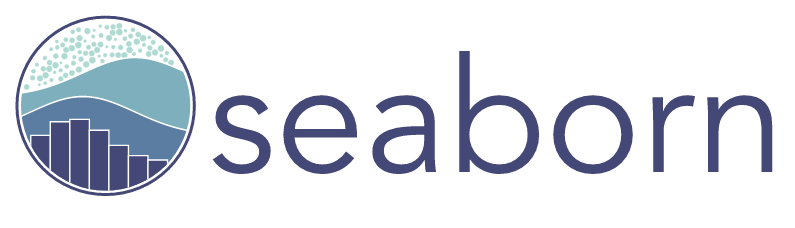

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

## Seaborn Versus Matplotlib

Here is an example of a simple random number plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Let's create some fictitious random data:

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

Now let's see what a basic matplotlib plot looks like:

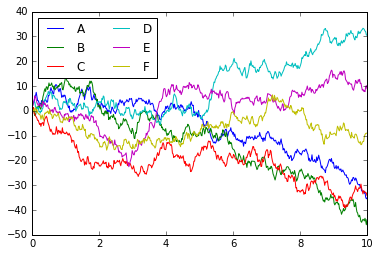

In [3]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [4]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

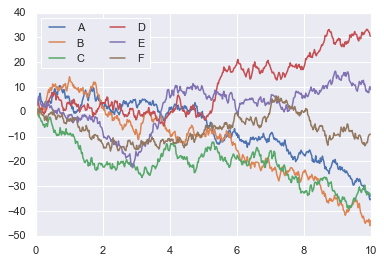

In [5]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Much better!

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

Let's use a real dataset that's built into Seaborn to examine the data. The dataset specifies numerous attributes of about 54,000 diamonds, and contains the following attributes:

- Price: Price in US dollars

- Carat: Carat weight of the diamond

- Cut: Quality of the diamond (Fair, Good, Very Good, Premium, Ideal)

- Color: Color of diamond, from J (worst) to D (best)

- Clarity: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x: Length in mm

- y: Width in mm

- z: Depth in mm

- Depth: Total depth percentage = z / mean(x, y) = 2 * z / (x + y)

- Table: Width of top of diamond relative to widest point

In [6]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Next we will do some dataset filtering to include only every twentieth point. In practice, we shouldn't just throw away part of the dataset if we can avoid it. Here we are doing it to make some of the upcoming graphs easier to work with and interpret.

In [7]:
diamonds = diamonds[::20]

Let's look for some relationships between the variables. Remember that correlations can only be done between numerical values. We could convert the categorical values to numbers, but have not done it here. For example, a cut of 'Premium' could be 0 and 'Ideal' could be 1.

In [8]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.026780,0.152871,0.918777,0.969293,0.968242,0.968085
depth,0.026780,1.000000,-0.230822,-0.011267,-0.026112,-0.029955,0.098414
table,0.152871,-0.230822,1.000000,0.105605,0.167889,0.161866,0.135288
price,0.918777,-0.011267,0.105605,1.000000,0.875639,0.877139,0.870770
x,0.969293,-0.026112,0.167889,0.875639,1.000000,0.998945,0.991700
y,0.968242,-0.029955,0.161866,0.877139,0.998945,1.000000,0.991156
z,0.968085,0.098414,0.135288,0.870770,0.991700,0.991156,1.000000


We see that the strongest relationships are between carat and the x,y,z columns. This makes sense because the weight of the diamond (number of carats) would of course depend on its size.

We can colorize the correlation matrix using a heatmap. There are different color mappings available.

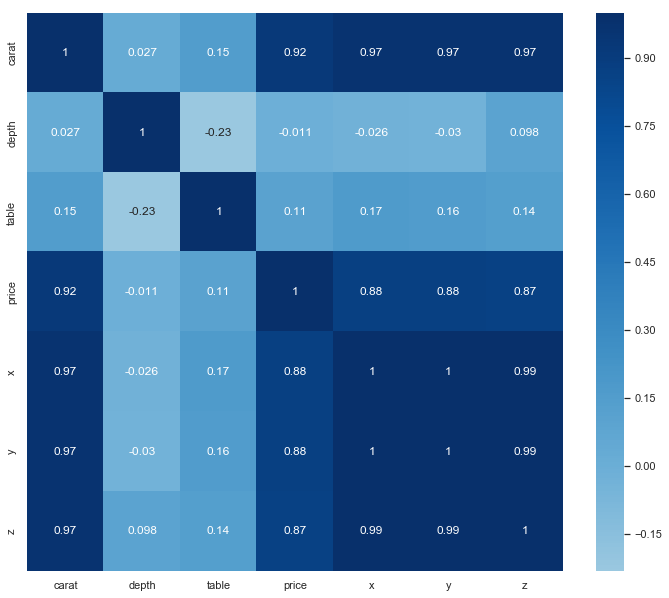

In [9]:
from matplotlib import cm
plt.figure(figsize=(12,10))
sns.heatmap(diamonds.corr(), cmap=cm.Blues, annot=True, center=0)
#sns.heatmap(diamonds.corr(), cmap=cm.PiYG, annot=True, center=0)
#sns.heatmap(diamonds.corr(), annot=True, center=0)

### We can make scatter plots with the relplot command.

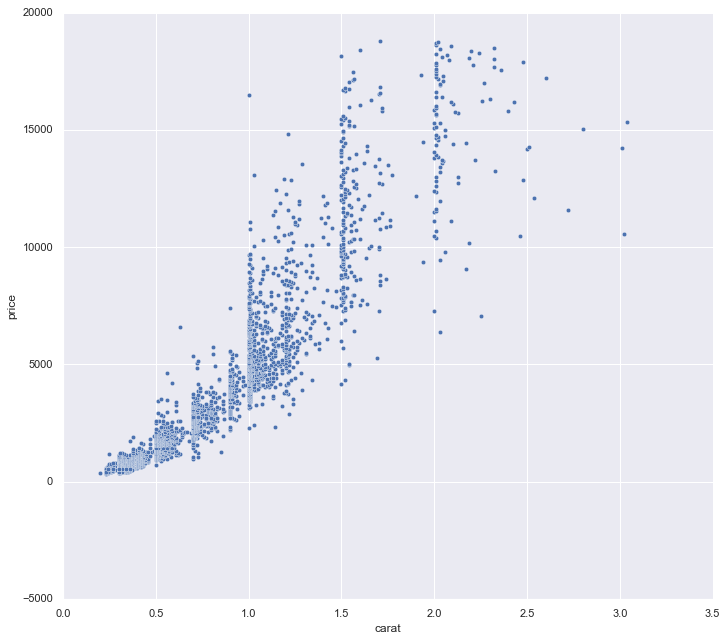

In [10]:
g = sns.relplot(data=diamonds, x='carat', y='price')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Same plot as above, but color the points based on the diamond cut.

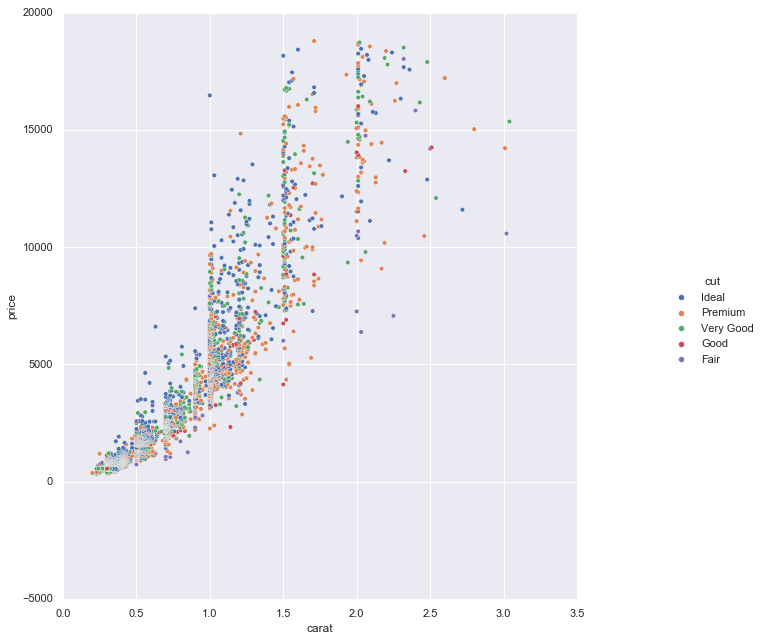

In [11]:
g = sns.relplot(data=diamonds, x='carat', y='price', hue='cut')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Same plot as above, but now color the points based on the diamond cut and plot a different shape for each clarity.

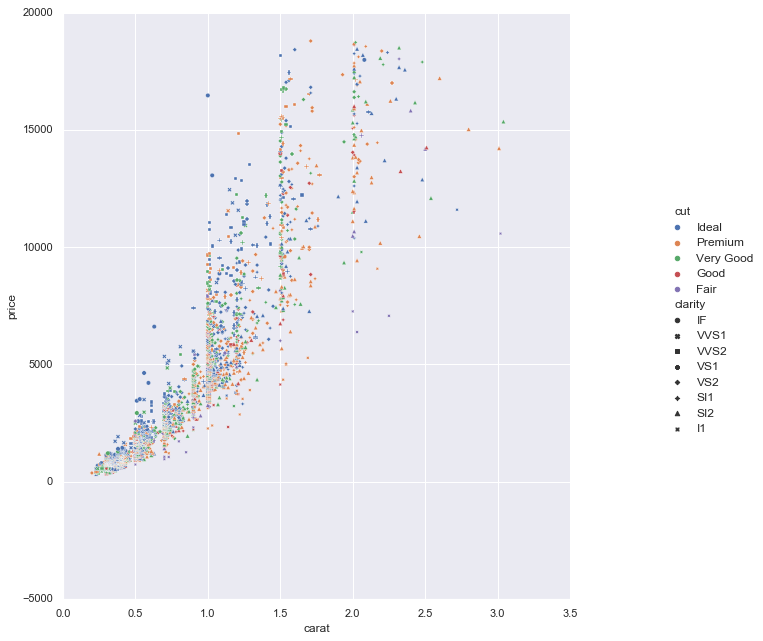

In [12]:
g = sns.relplot(data=diamonds, x='carat', y='price', hue='cut', style='clarity')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Same plot as above, but now create a separate plot for each diamond color.

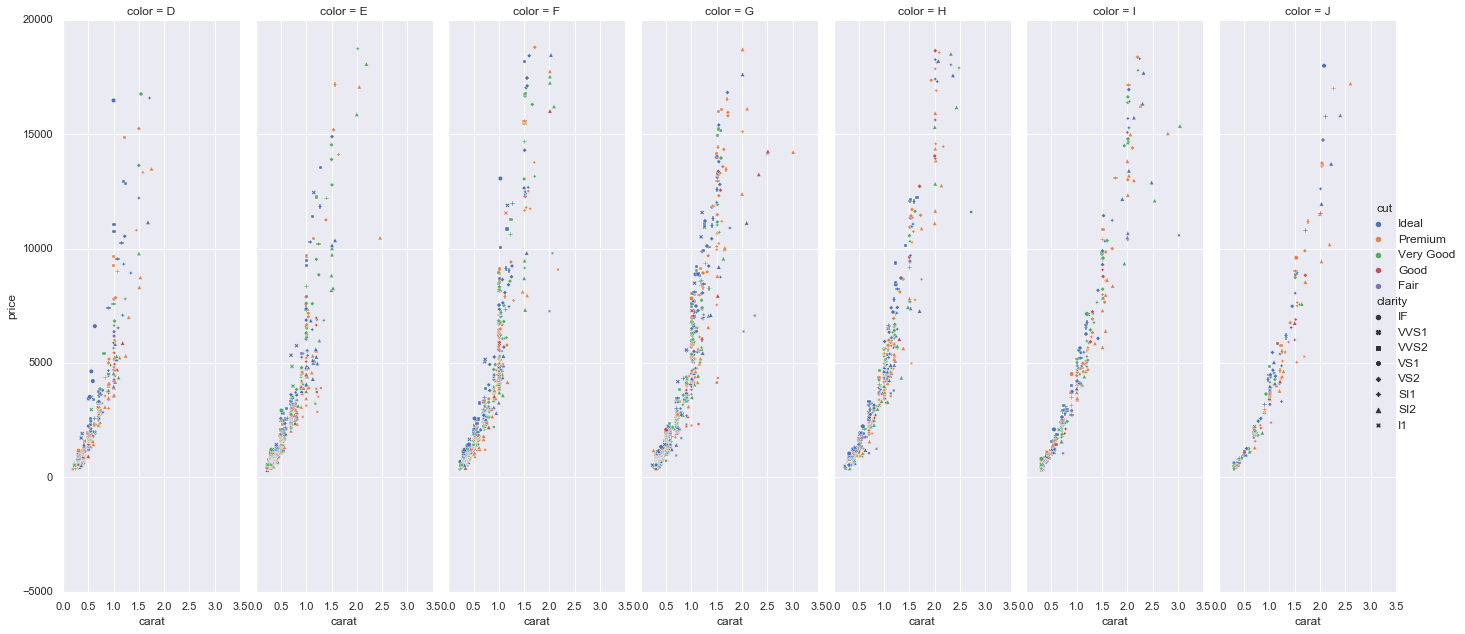

In [13]:
g = sns.relplot(data=diamonds, x='carat', y='price', hue='cut', style='clarity', col = 'color')
g.fig.set_figwidth(20)
g.fig.set_figheight(10)

Scatter plot with trend line.

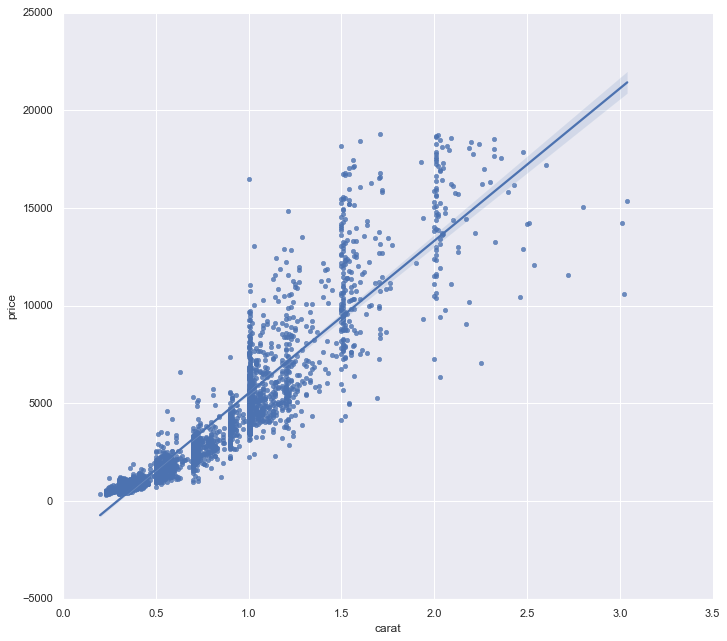

In [14]:
g = sns.lmplot(x='carat', y='price', data=diamonds)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Same as above, but make a separate plot for each clarity.

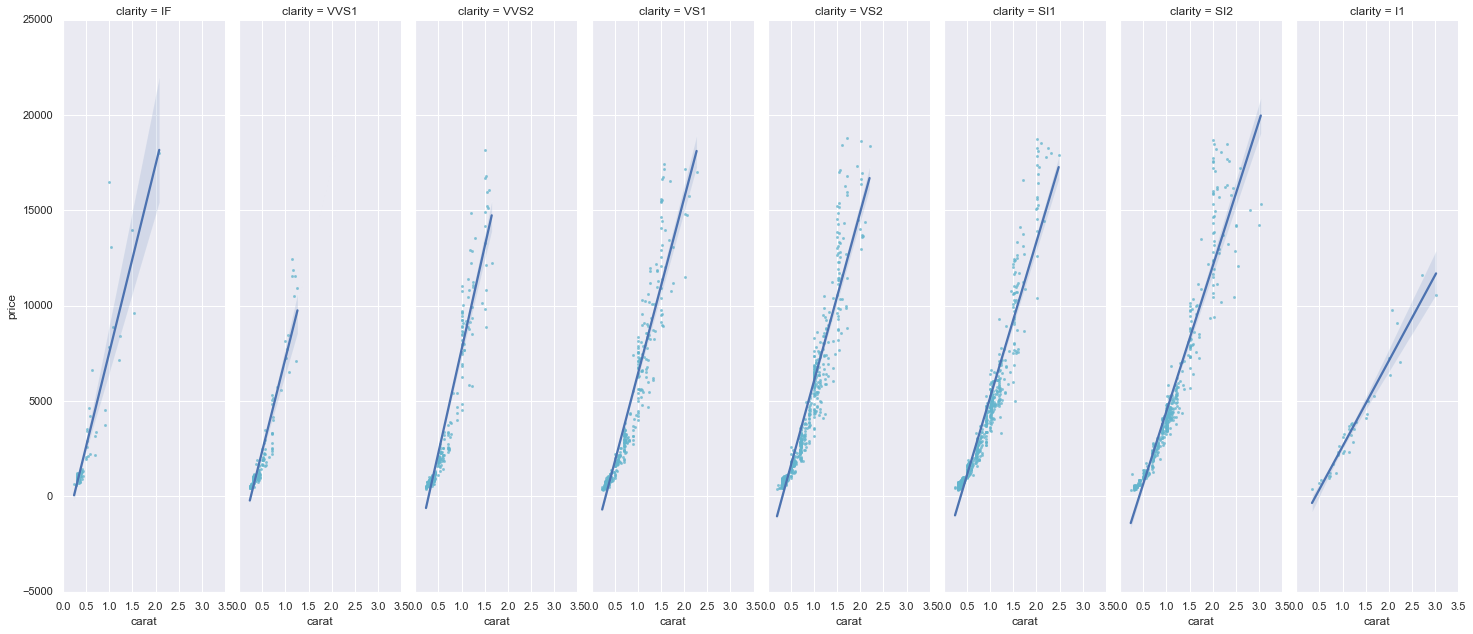

In [15]:
g = sns.lmplot(data=diamonds, x='carat', y='price', col='clarity', 
               markers=".", scatter_kws=dict(color='c'))
g.fig.set_figwidth(20)
g.fig.set_figheight(10)

### Bar plots

Bar plots allow us to see the mean and spread of the values in a column. Below, we look at the average price of the diamond based on the cut.

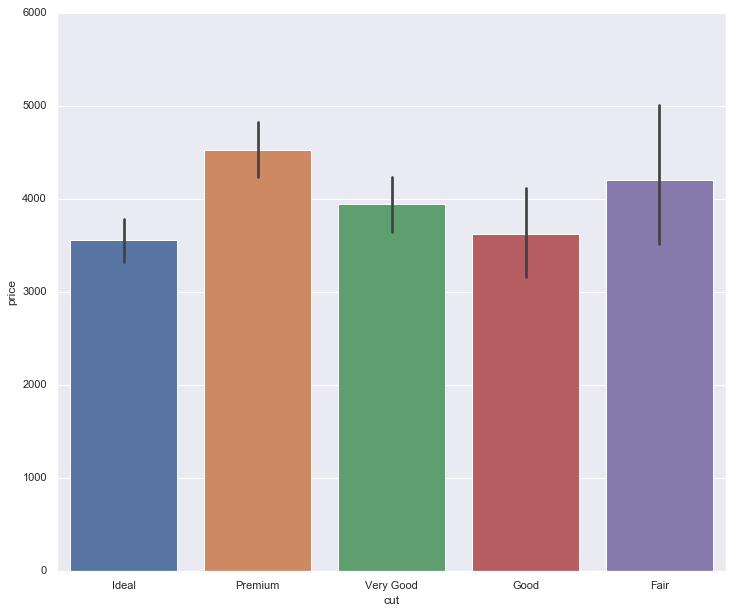

In [16]:
g = sns.barplot(x='cut', y='price', data=diamonds)
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

Now flip it sideways by specifying the y parameter first.

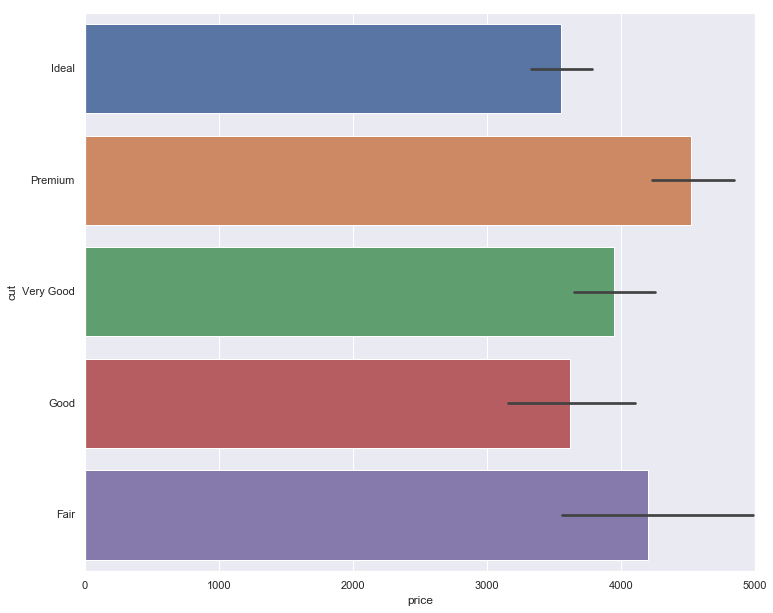

In [17]:
g = sns.barplot(y='cut', x='price', data=diamonds)
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

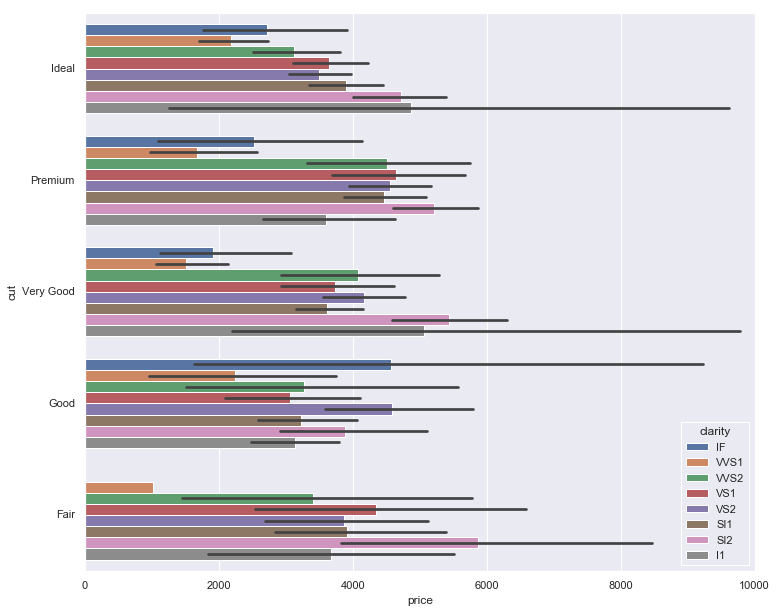

In [18]:
g = sns.barplot(y='cut', x='price', hue='clarity', data=diamonds)
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. Here we also see how to set a title and axis labels.


If you get the following message when running the cell below: 

AttributeError: module 'seaborn' has no attribute 'displot'. 

Try this command at the beginning of the cell below.

!pip install seaborn --user --upgrade

You should see some text about installing seaborn and then a mention that it was successful followed by the same error that you got earlier. Now restart the notebook (close and then choose Shutdown, then reopen), then Run All and it should generate the histogram. Once it's fixed, comment out the pip line below for future runs.

Why would this happen? Seaborn histograms used to be created using "distplot" instead of "displot". If you have an old version, it doesn't know what "displot" is.

Requirement already up-to-date: seaborn in c:\users\tdepa\appdata\roaming\python\python37\site-packages (0.11.2)


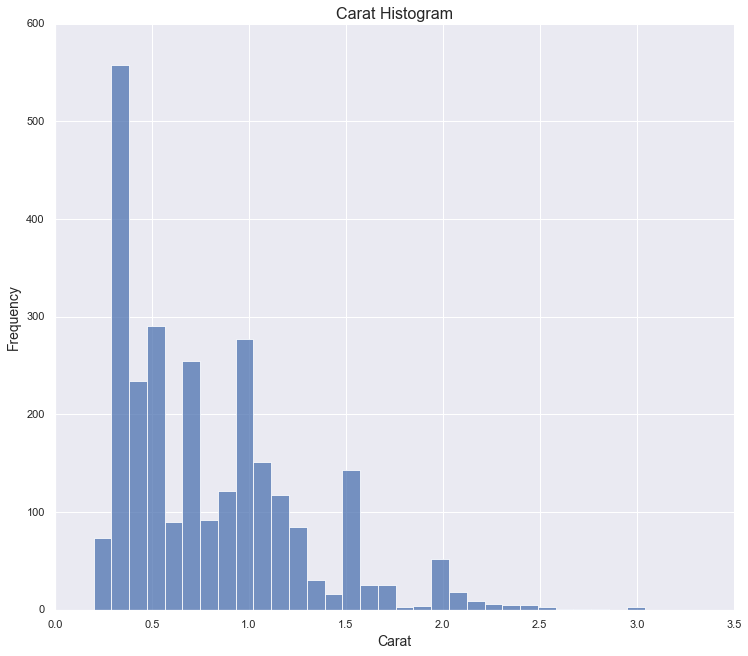

In [19]:
!pip install seaborn --user --upgrade
g = sns.displot(diamonds['carat'])
plt.title('Carat Histogram', fontsize=16)
plt.xlabel('Carat', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

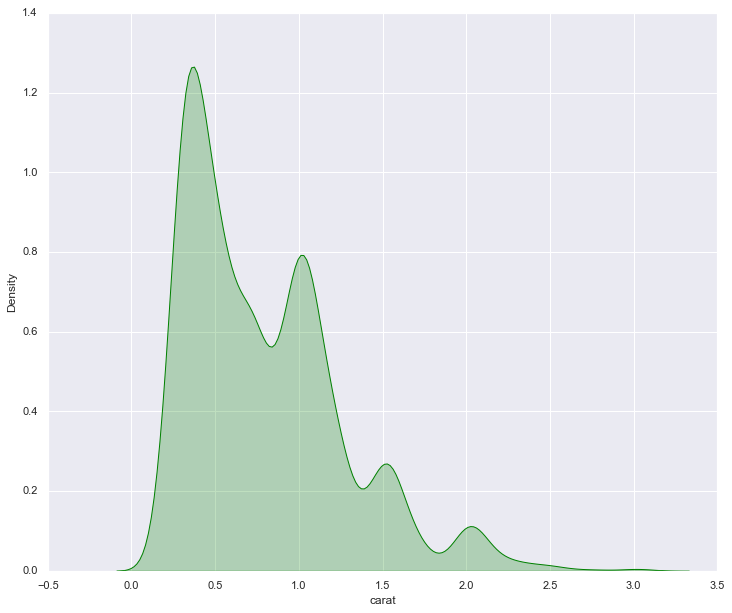

In [20]:
plt.figure(figsize=(12,10))
sns.kdeplot(diamonds['carat'], shade=True, color='green')

Histograms and KDE can be combined using ``displot`` if we set kde=True.

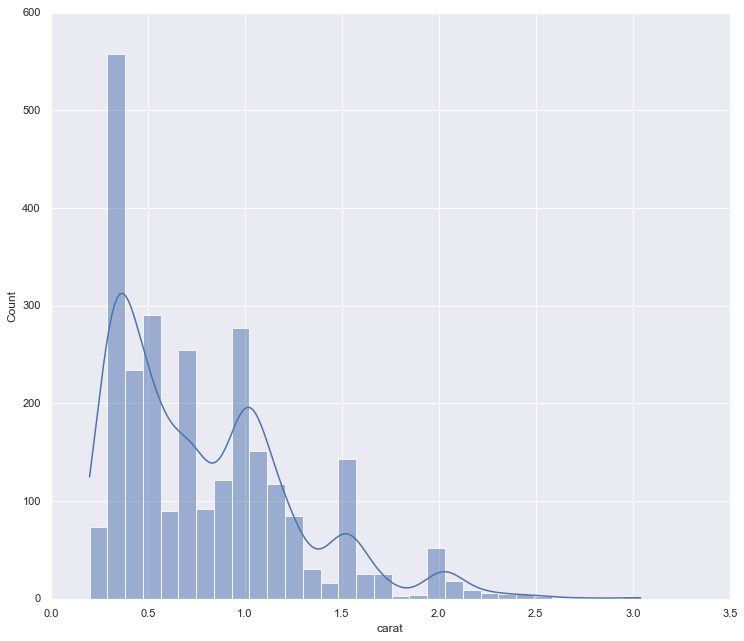

In [21]:
g = sns.displot(diamonds['carat'], kde=True)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

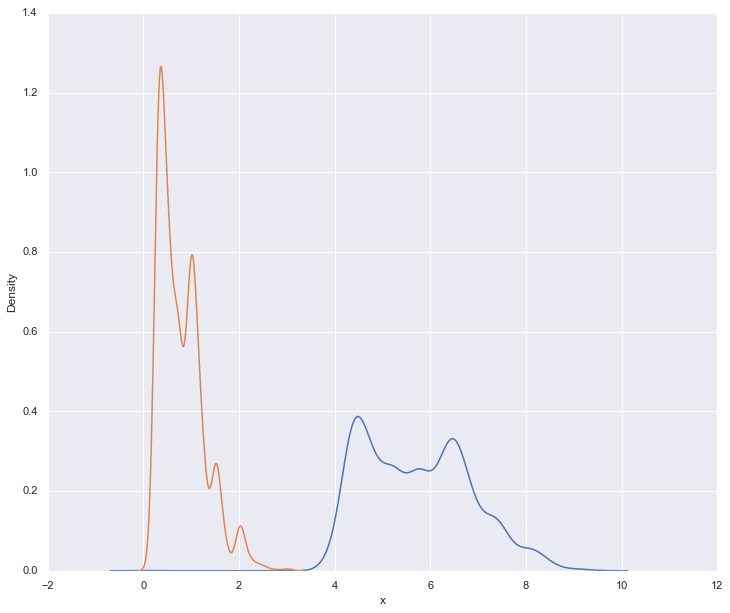

In [22]:
plt.figure(figsize=(12,10))
sns.kdeplot(diamonds['x'])
sns.kdeplot(diamonds['carat'])

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.

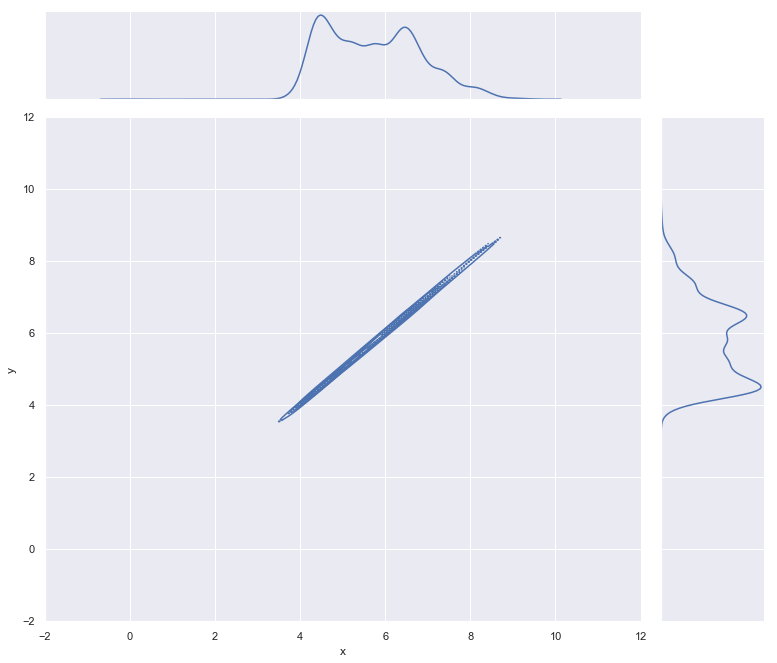

In [23]:
g = sns.jointplot(data=diamonds, x='x', y='y', kind='kde')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

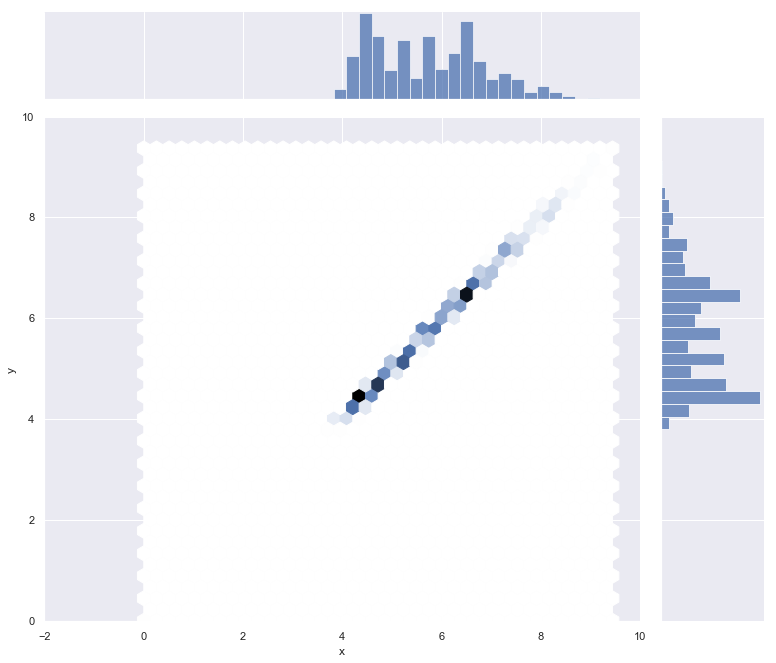

In [24]:
g = sns.jointplot(data=diamonds, x='x', y='y', kind='hex')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

We can create a best fit line for the data. The data here is randomly generated, so the regression line isn't a good one, but the concept is useful.

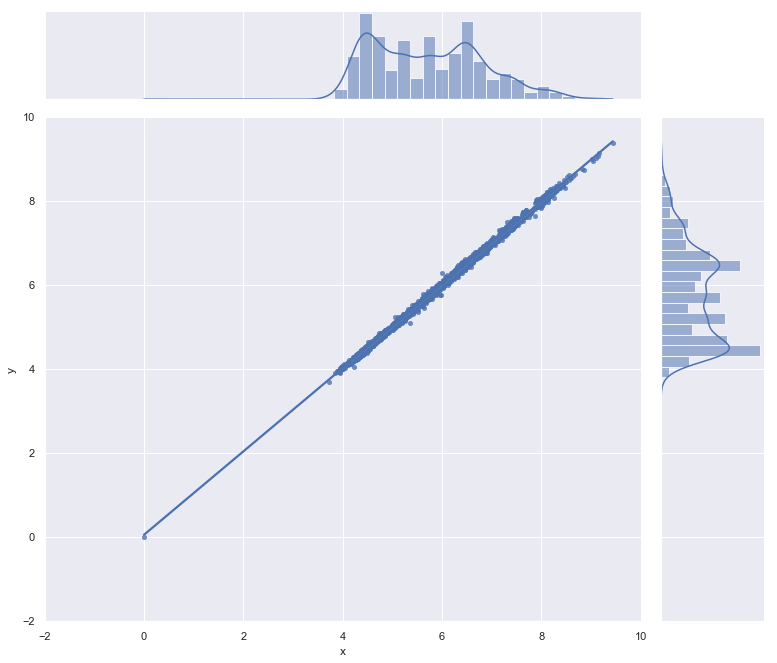

In [25]:
g = sns.jointplot(data=diamonds, x='x', y='y', kind='reg')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

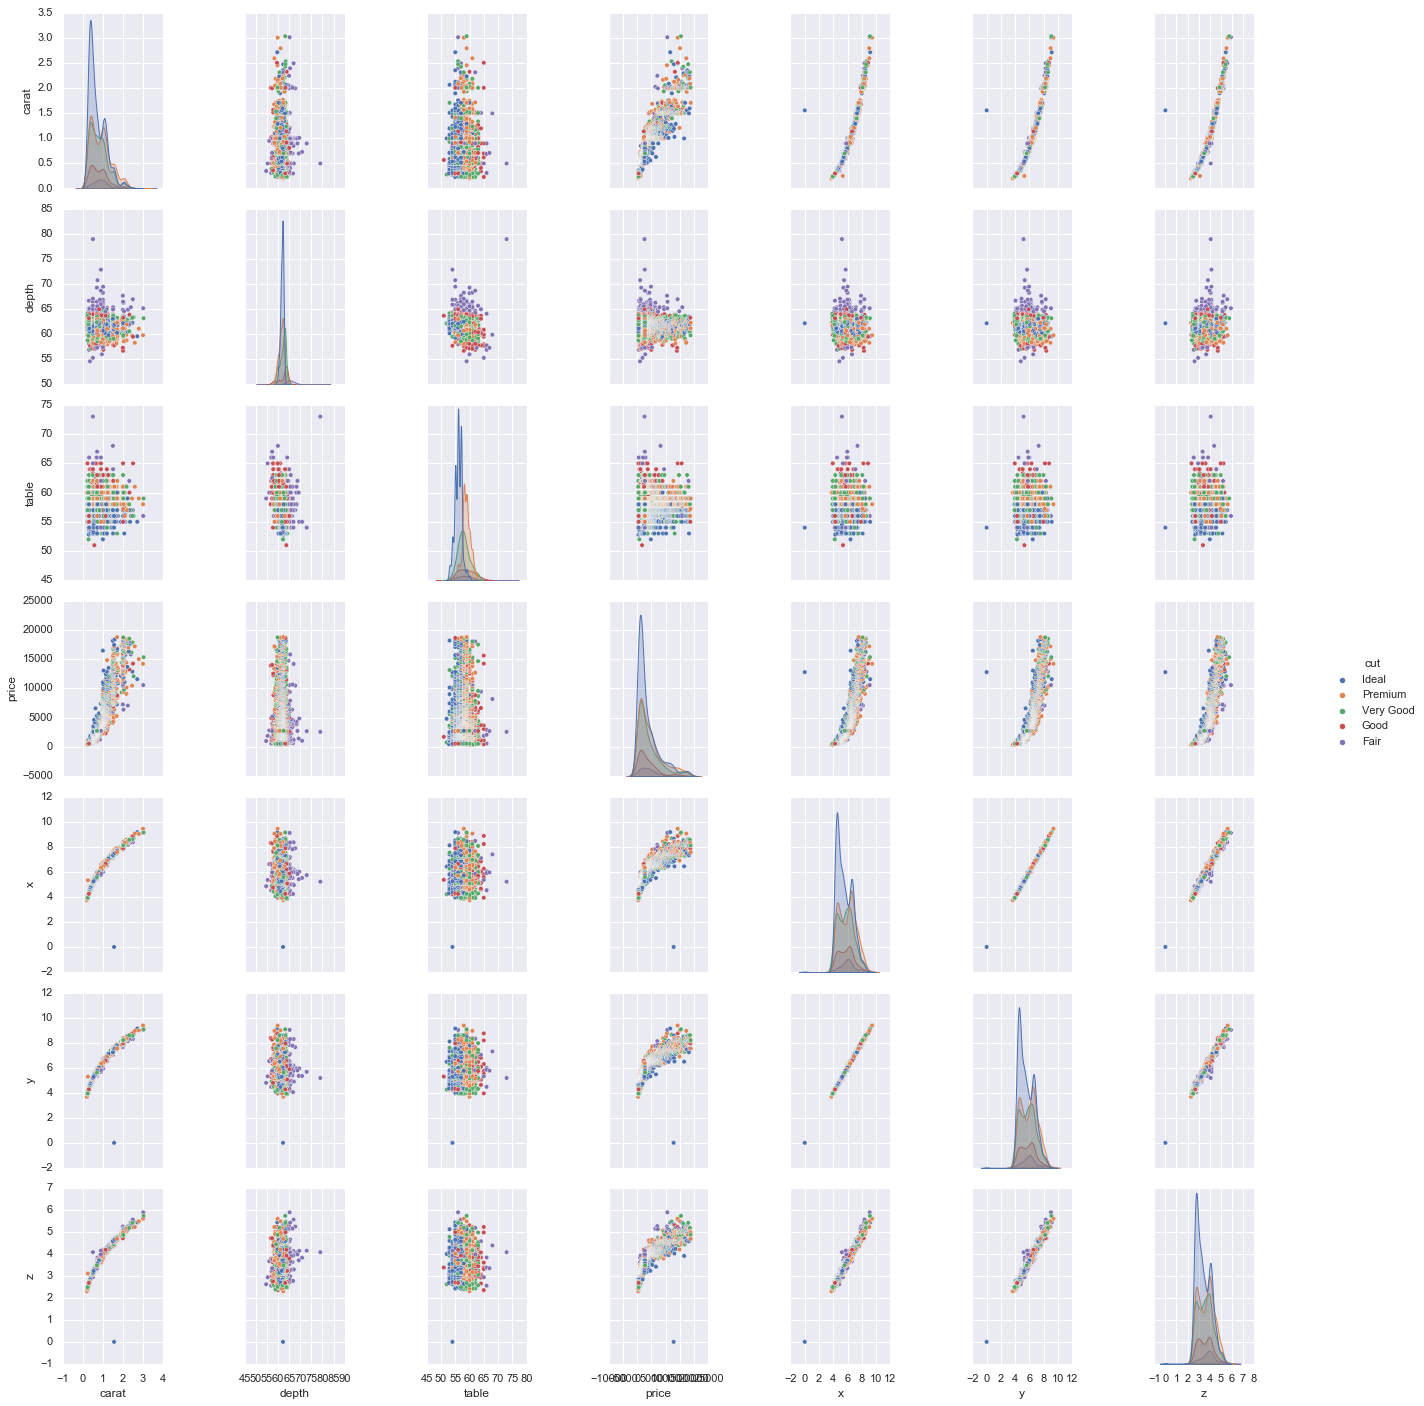

In [26]:
g = sns.pairplot(diamonds, hue='cut', height=2.5)
g.fig.set_figwidth(20)
g.fig.set_figheight(20)

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.

In [27]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
20,0.30,Good,I,SI2,63.3,56.0,351,4.26,4.30,2.71
40,0.33,Ideal,I,SI2,61.2,56.0,403,4.49,4.50,2.75
60,0.35,Ideal,I,VS1,60.9,57.0,552,4.54,4.59,2.78
80,0.26,Very Good,E,VVS1,63.4,59.0,554,4.00,4.04,2.55


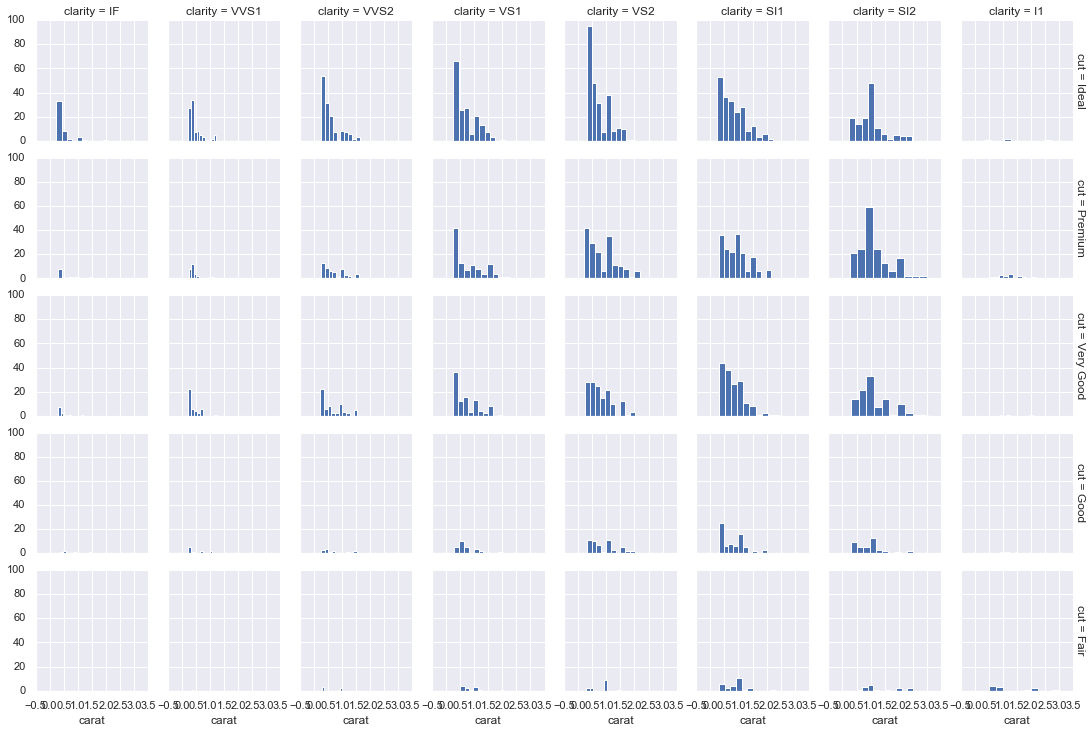

In [28]:
g = sns.FacetGrid(diamonds, row='cut', col='clarity', margin_titles=True)
g.map(plt.hist, 'carat')
g.fig.set_figwidth(15)
g.fig.set_figheight(10)

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

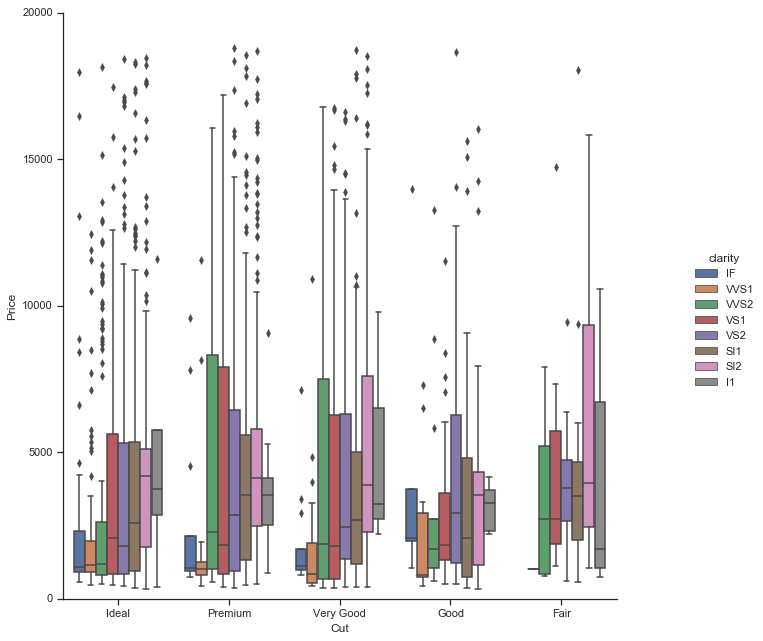

In [29]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=diamonds, x='cut', y='price', hue='clarity', kind="box")
    g.set_axis_labels('Cut', 'Price')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

### Violin plots

Violin plots help us see the distribution of values across a variable. The area where the graph is wider is where more data points fall. In the plot below, we see that most Ideal cut diamonds cost around 1000 dollars. Some of the distribution goes below 0 dollars due to the smoothing effect of the plot. We can see the actual points inside of the "violin".

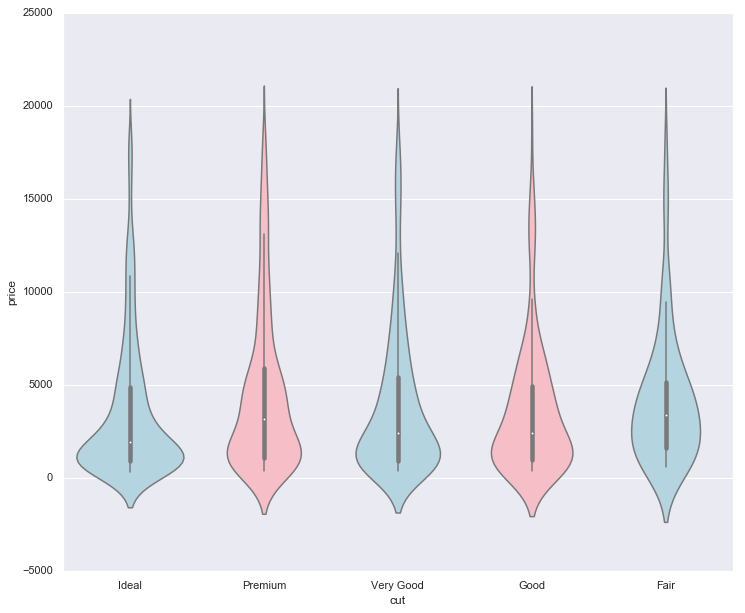

In [30]:
g = sns.violinplot(data=diamonds, x='cut', y='price',
               palette=["lightblue", "lightpink"])
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

To save a plot to file, first we have to name the Seaborn plot and then use the savefig function.

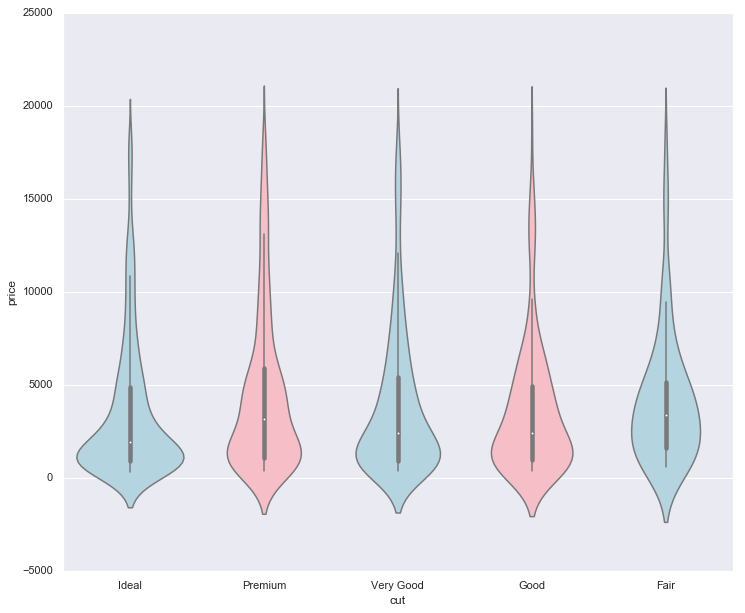

In [31]:
g = sns.violinplot(data=diamonds, x='cut', y='price',
               palette=["lightblue", "lightpink"])
g.figure.set_figwidth(12)
g.figure.set_figheight(10)
g.figure.savefig('output.jpg', format='jpeg', dpi=200)

A swarm plot shows all of the underlying data side by side. The difference in x-values within a category has no meaning here. It is just meant to show where the density lies.

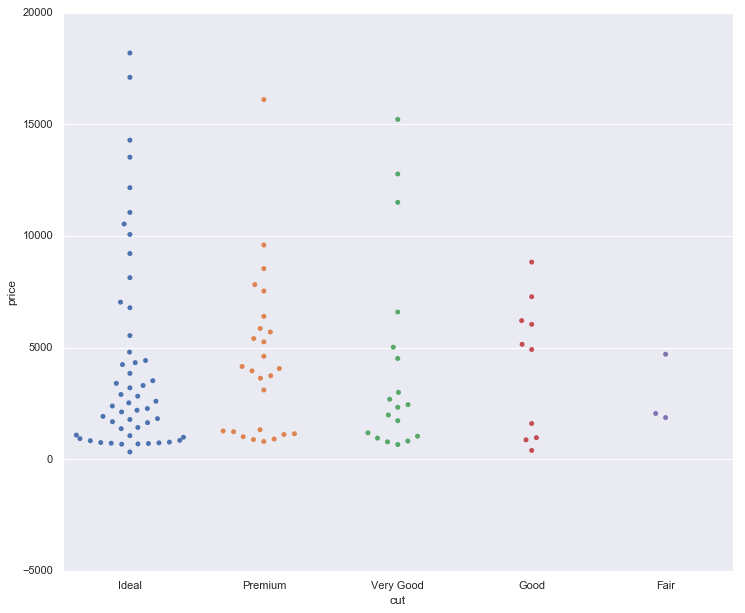

In [32]:
g = sns.swarmplot(data=diamonds[::25], x='cut', y='price') # Take every twenty-fifth point to make graph easier to read
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

We can also combine violin and swarm plots.

Text(0.5, 1.0, 'Diamond Price vs. Cut')

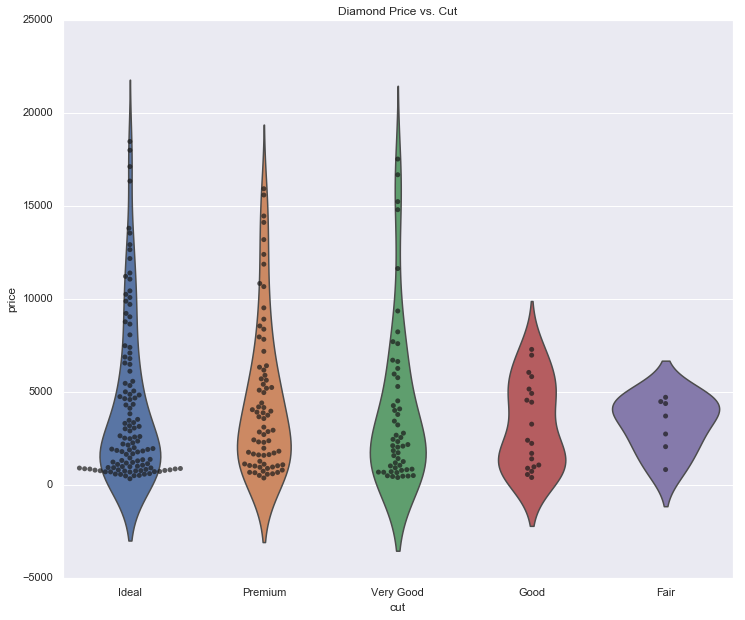

In [33]:
# Set figure size with matplotlib
plt.figure(figsize=(12,10))
 
# Create plot
sns.violinplot(x='cut',
               y='price', 
               data=diamonds[::10], # Take every 10th point to make graph easier to read
               inner=None) # Remove the bars inside the violins
 
sns.swarmplot(x='cut', 
              y='price', 
              data=diamonds[::10], # Take every 10th point to make graph easier to read
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Diamond Price vs. Cut')